In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned_telco_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [4]:
df["gender_cat"] = df["gender"].map({0:"Female",1:"Male"})

In [5]:
import seaborn as sns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_cat
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,Male
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,Male
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,Female


C:\Users\Ayman\AppData\Local\Temp\ipykernel_8236\961690350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


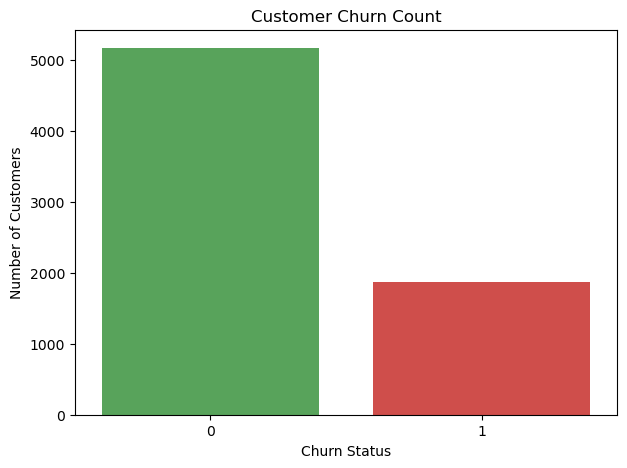

In [57]:
plt.figure(figsize=(7,5))

sns.countplot(data=df,x="Churn",palette=["#4CAF50", "#E53935"])

plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

plt.show()

 Churn = 0 represents customers who did not leave the service.
 Churn = 1 represents customers who churned (left) the service.

 The chart shows that non-churned customers are significantly more than churned customers, roughly around 70–75% non-churn vs 25–30% churn.

In [13]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [14]:
print(1869+5174)

7043


In [15]:
churn_rate = (1869/7043)*100
churn_rate

26.536987079369588

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_cat'],
      dtype='object')

C:\Users\Ayman\AppData\Local\Temp\ipykernel_8236\3905293971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Contract",y="Churn",palette=["#1E88E5", "#FB8C00"])
C:\Users\Ayman\AppData\Local\Temp\ipykernel_8236\3905293971.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df,x="Contract",y="Churn",palette=["#1E88E5", "#FB8C00"])


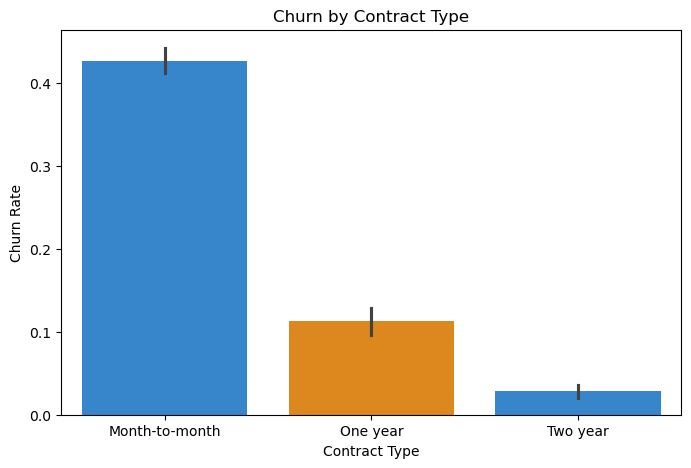

In [59]:
plt.figure(figsize=(8,5))

sns.barplot(data=df,x="Contract",y="Churn",palette=["#1E88E5", "#FB8C00"])

plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")

plt.show()


There is a clear, inverse relationship between contract length and churn rate. As the commitment length increases, the churn rate significantly decreases.

Month-to-month: This group has the highest churn rate by a wide margin, sitting at over 40% (approx. 0.43). This suggests these customers are highly volatile and may be using the service temporarily or are more sensitive to price changes and competitor offers.

One year: The churn rate drops drastically for customers on a one-year contract, falling to around 11% (approx. 0.11).

Two year: Customers with the longest commitment have the highest loyalty, with a churn rate of less than 5% (approx. 0.03).


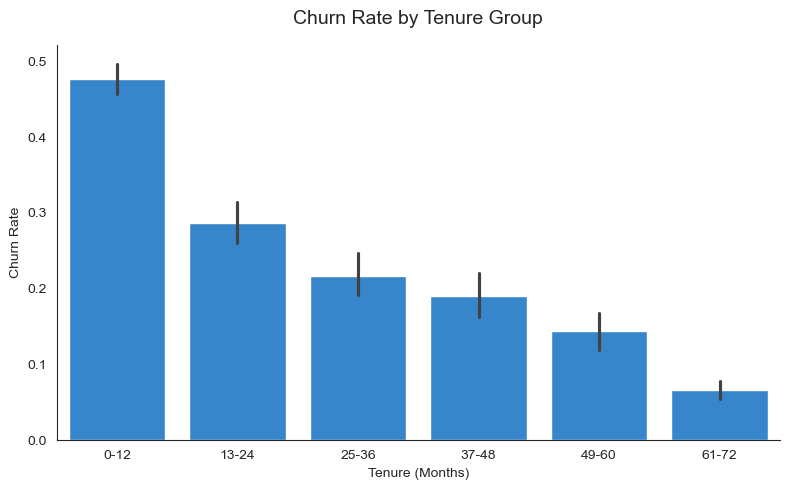

In [62]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=["0-12", "13-24", "25-36", "37-48", "49-60", "61-72"]
)

sns.set_style("white") 
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="tenure_group", y="Churn", color="#1E88E5")
plt.title("Churn Rate by Tenure Group", fontsize=14, pad=15)
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
sns.despine()
plt.tight_layout()
plt.show()



Core Trend: Survival Bias
The chart demonstrates a strong negative correlation between tenure and churn. As customers stay longer, the likelihood of them leaving significantly decreases.

0–12 Months: This group has the highest churn rate by far, approaching 50% (approximately 0.48). This indicates that the first year is the highest-risk period for losing a customer.

Steady Decline: Churn rates drop consistently as tenure increases, moving from nearly 30% in the second year down to roughly 15% by years four and five.

61–72 Months: The most loyal customers—those staying over five years—have the lowest churn rate, falling below 10% (approximately 0.07).

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_cat', 'tenure_group'],
      dtype='object')

In [18]:
df["MonthlyCharges"]

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [23]:
df["MonthlyCharges"].max()

118.75

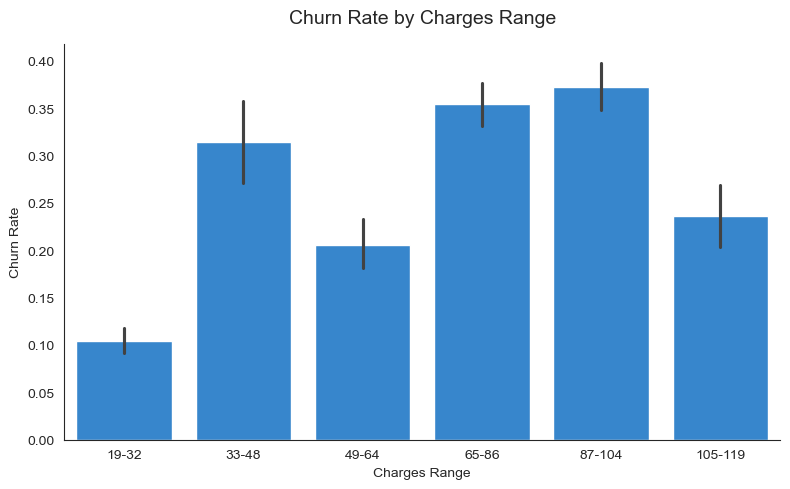

In [66]:
df["Charges_group"] = pd.cut(
    df["MonthlyCharges"],
    bins=[19,32,48,64,86,104,119],
    labels=[ "19-32", "33-48", "49-64", "65-86", "87-104","105-119"]
)
plt.figure(figsize=(8,5))
sns.barplot(x="Charges_group", y="Churn", data=df, color="#1E88E5")
plt.title("Churn Rate by Charges Range", fontsize=14, pad=15)
plt.xlabel("Charges Range")
plt.ylabel("Churn Rate")
sns.despine()
plt.tight_layout()
plt.show()

Lowest Churn (19–32): Customers in the lowest price bracket have the lowest churn rate, at approximately 10%. This group likely represents budget-conscious users with basic service needs.

Peak Churn (65–104): Churn rates climb significantly as prices increase, peaking in the mid-to-high range. The 87–104 bracket shows the highest churn at nearly 37%. These customers may feel the price no longer matches the perceived value or are being targeted by competitor mid-range offers.

The Dip (49–64): There is a notable "valley" where churn drops to about 20%. This could represent a "sweet spot" for pricing where customers feel they are getting the best value for their money.

Premium Drop-off (105–119): Interestingly, churn decreases to about 24% for the highest-paying customers. These may be high-value enterprise or power users who are less price-sensitive or more dependent on the full suite of services.

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_cat', 'tenure_group', 'Charges_group'],
      dtype='object')

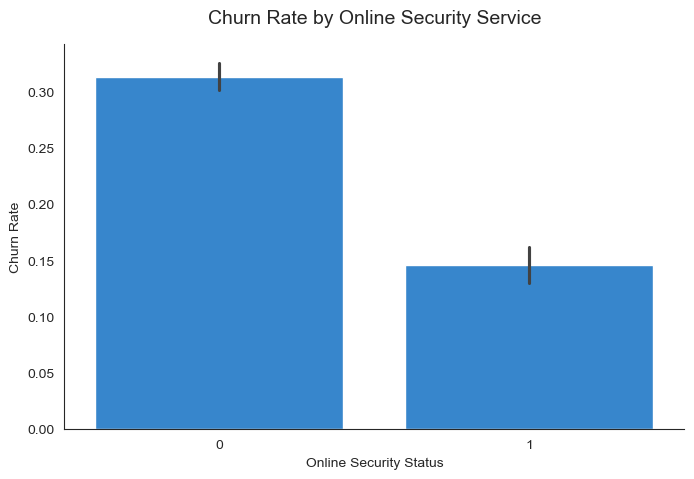

In [70]:
sns.set_style("white")
plt.figure(figsize=(8,5))
sns.barplot(x="OnlineSecurity", y="Churn", data=df, color="#1E88E5")
plt.title("Churn Rate by Online Security Service", fontsize=14, pad=15)
plt.xlabel("Online Security Status")
plt.ylabel("Churn Rate")
sns.despine()
plt.show()

Status 0 (No Security): Customers without online security have a much higher churn rate, exceeding 30% (approx. 0.31).

Status 1 (Security Active): Customers with the service are significantly more loyal, with a churn rate under 15% (approx. 0.14).

Significance: Adding "sticky" services like security creates a higher barrier to leaving, effectively cutting the churn rate in half.

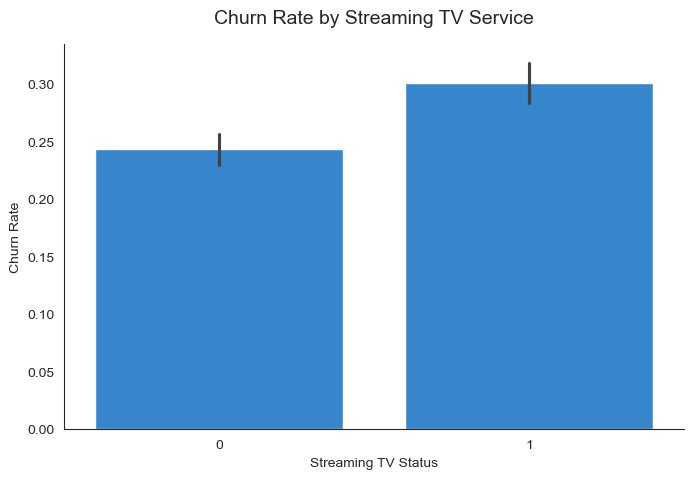

In [72]:
sns.set_style("white")
plt.figure(figsize=(8,5))
sns.barplot(x="StreamingTV", y="Churn", data=df, color="#1E88E5")
plt.title("Churn Rate by Streaming TV Service", fontsize=14, pad=15)
plt.xlabel("Streaming TV Status")
plt.ylabel("Churn Rate")
sns.despine()
plt.show()

Churn by Streaming TV Service
This chart indicates a notable difference in retention based on the use of entertainment services.

Status 0 (No Streaming TV): Customers without this service have a churn rate of approximately 24%.

Status 1 (Streaming TV Active): Those with the service have a higher churn rate, reaching roughly 30%.

Significance: Unlike security services, streaming TV appears to be associated with a higher likelihood of churn.

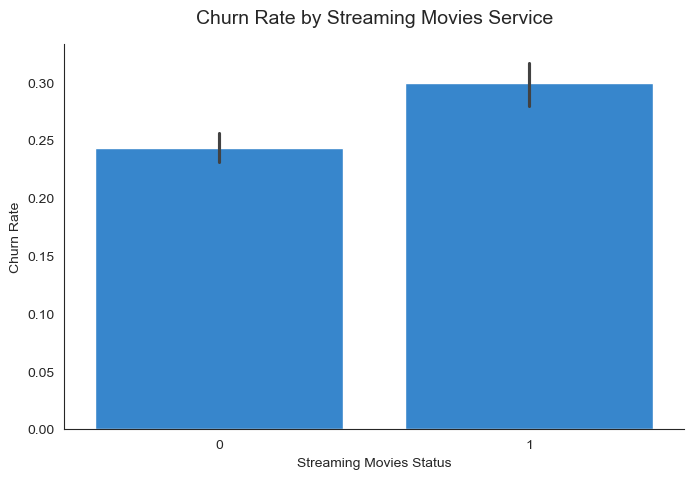

In [73]:
# Set the clean style
sns.set_style("white")

plt.figure(figsize=(8,5))
sns.barplot(x="StreamingMovies", y="Churn", data=df, color="#1E88E5")

plt.title("Churn Rate by Streaming Movies Service", fontsize=14, pad=15)
plt.xlabel("Streaming Movies Status")
plt.ylabel("Churn Rate")
sns.despine()
plt.show()

1. Time-Based Loyalty (Tenure)
There is a clear "survival" trend where the risk of churn decreases as a customer's tenure increases:

High-Risk Entry: The highest churn occurs in the first 0–12 months, with a rate approaching 48%.

The 5-Year Milestone: Loyalty peaks for customers who have stayed 61–72 months, where churn falls below 10%.

2. Pricing and Monthly Charges
Monthly billing amounts show a non-linear relationship with churn, identifying a specific "danger zone":

Budget Stability: Customers paying 19–32 have the lowest churn at roughly 10%.

The Danger Zone: Churn peaks in the 87–104 range, where nearly 37% of customers leave the service.

Premium Retention: Interestingly, churn drops to ~24% for the highest-paying bracket (105–119), suggesting high-value users may be more committed to the service.

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_cat,tenure_group,Charges_group
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0-12,19-32
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,Male,25-36,49-64
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0-12,49-64
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,37-48,33-48
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0-12,65-86


In [37]:
df.drop("customerID",axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_cat,tenure_group,Charges_group
0,0,0,1,0,1,0,No phone service,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0-12,19-32
1,1,0,0,0,34,1,No,DSL,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,Male,25-36,49-64
2,1,0,0,0,2,1,No,DSL,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0-12,49-64
3,1,0,0,0,45,0,No phone service,DSL,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,37-48,33-48
4,0,0,0,0,2,1,No,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0-12,65-86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,1,0,...,1,One year,1,Mailed check,84.80,1990.50,0,Male,13-24,65-86
7039,0,0,1,1,72,1,Yes,Fiber optic,0,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,Female,61-72,87-104
7040,0,0,1,1,11,0,No phone service,DSL,1,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,0-12,19-32
7041,1,1,1,0,4,1,Yes,Fiber optic,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,Male,0-12,65-86


In [41]:
numeric_col = df.select_dtypes(include=["int64","float64"])
corr_matrix=numeric_col.corr()

In [48]:
churn_corr = corr_matrix["Churn"].sort_values(ascending=False)
churn_corr

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
PhoneService        0.011942
gender             -0.008612
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.199037
tenure             -0.352229
Name: Churn, dtype: float64

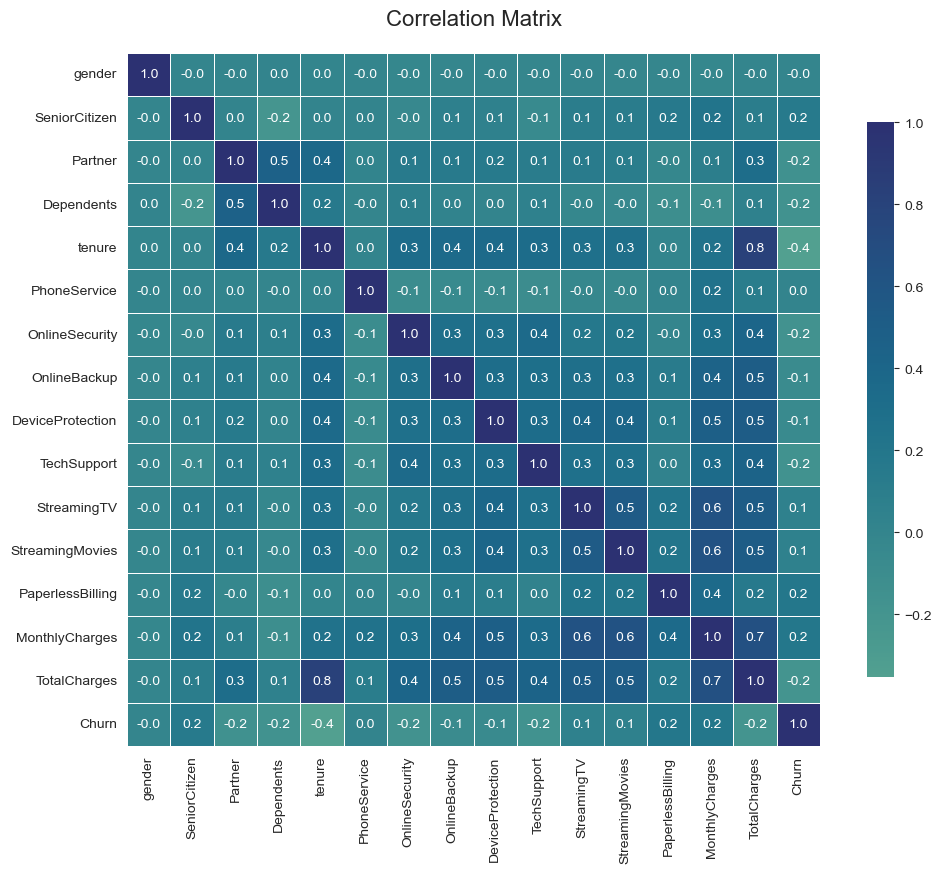

In [74]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, cmap="crest", center=0, annot=True, fmt=".1f", linewidths=.5, square=True, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.show()

Total Charges vs. Tenure: A very high correlation of 0.8 indicates that total revenue is primarily driven by how long a customer stays.

Streaming Synergy: Streaming TV and Streaming Movies are strongly correlated with each other (0.5) and with higher Monthly Charges (0.6). This suggests that customers with entertainment packages are paying more, which may contribute to their higher churn rates.

Paperless Billing: This feature has a 0.2 positive correlation with churn, suggesting that customers who receive digital bills might be slightly more likely to leave.

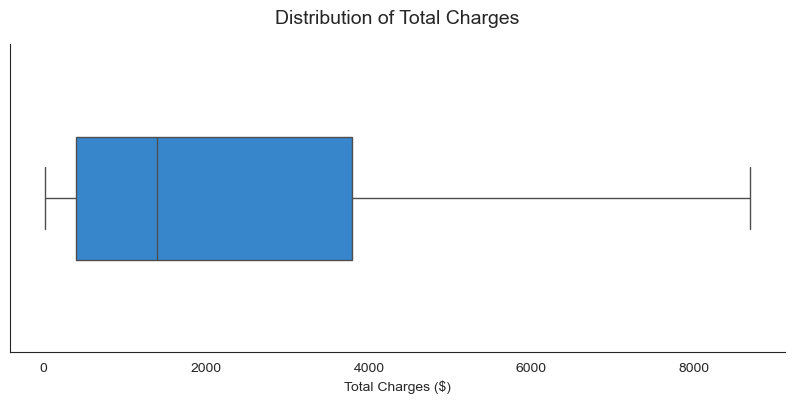

In [75]:
sns.set_style("white")

plt.figure(figsize=(10, 4))

sns.boxplot(x="TotalCharges", data=df, color="#1E88E5", width=0.4, fliersize=4)

plt.title("Distribution of Total Charges", fontsize=14, pad=15)
plt.xlabel("Total Charges ($)")
sns.despine()

plt.show()

Central Tendency and Spread
The box plot highlights how the financial value of the customer base is distributed, showing a significant skew toward lower total charges.

Median Value: The vertical line inside the blue box represents the median total charge, which sits at approximately $1,500. This means 50% of the customer base has generated less than this amount in total revenue.

Interquartile Range (IQR): The blue box representing the middle 50% of customers spans from roughly $400 (25th percentile) to nearly $4,000 (75th percentile).

Maximum Range: The "whisker" on the right extends to approximately $8,600, indicating the highest total charges in the dataset.

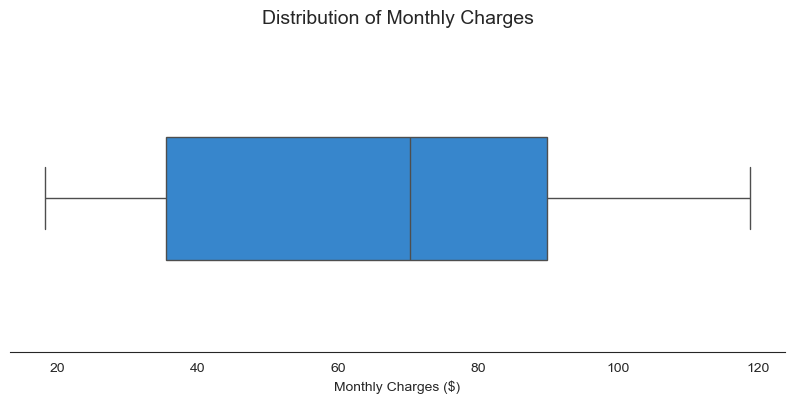

In [76]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="MonthlyCharges", data=df, color="#1E88E5", width=0.4, fliersize=4)

plt.title("Distribution of Monthly Charges", fontsize=14, pad=15)
plt.xlabel("Monthly Charges ($)")
sns.despine(left=True)
plt.show()

Core Statistics and Billing Range
The box plot illustrates that monthly charges are relatively well-distributed across a broad range, without a single dominant price point.

Median Charge: The vertical line dividing the blue box shows a median monthly charge of approximately $70. This is the "middle" price paid by the customer base.

Interquartile Range (IQR): The central blue box, representing the middle 50% of customers, spans from roughly $35 (25th percentile) to $90 (75th percentile).

Full Range: Costs range from a minimum of approximately $18 to a maximum of nearly $119 per month.